# **AMST - EDA para predição de Color EBC**

Este notebook realiza uma **Análise Exploratória de Dados (EDA)** detalhada
com foco na **predição da cor (Color - EBC)** do mosto frio para o produto **AMST**.

O objetivo é:

- Entender a estrutura dos dados
- Investigar qualidade, distribuições e relações entre variáveis
- Identificar features relevantes e potenciais novas features
- Orientar na escolha de modelos que serão testados na etapa de **modelagem**


**Variaveis do Dataset**

| Variável                        | Descrição                                                                                                                                                                       |
| ------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Job ID**                      | Identificador único de cada lote (batch) de produção.                                                                                                                           |
| **Date/Time**                   | Data e horário de início do processo produtivo do lote.                                                                                                                         |
| **Roast amount (kg)**           | Quantidade de malte torrado utilizada no lote (em quilogramas).                                                                                                                 |
| **1st (base) malt amount (kg)** | Quantidade de malte base primário utilizada no lote (em quilogramas).                                                                                                           |
| **2nd (base) malt amount (kg)** | Quantidade de malte base secundário utilizada no lote (em quilogramas). Os maltes base 1º e 2º são misturados durante a moagem, mas podem ser provenientes de lotes diferentes. |
| **MT – Temperature (°C)**       | Temperatura média agregada do cozinhador de malte (*Malt Cooker*).                                                                                                              |
| **MT – Time (s)**               | Tempo total em que o lote permaneceu no cozinhador de malte (em segundos).                                                                                                      |
| **WK – Temperature (°C)**       | Temperatura média agregada do cozinhador de mosto (*Wort Cooker*).                                                                                                              |
| **WK – Steam**                  | Quantidade agregada de vapor aplicada no cozinhador de mosto.                                                                                                                   |
| **WK – Time (s)**               | Tempo total em que o lote permaneceu no cozinhador de mosto (em segundos).                                                                                                      |
| **Total cold wort (HL)**        | Volume total de mosto frio após o resfriamento do lote (em hectolitros).                                                                                                        |
| **pH**                          | Valor médio de pH do lote medido durante a etapa de resfriamento.                                                                                                               |
| **Extract (°P)**                | Extrato médio do lote medido durante o resfriamento (graus Plato). Representa a concentração de açúcares dissolvidos no mosto.                                                  |
| **Color (EBC)**                 | **Variável alvo do modelo.** Cor do mosto medida por sensor, expressa em unidades EBC (*European Brewery Convention*).                                                          |
| **WOC – Time (s)**              | Tempo total em que o lote permaneceu no resfriador de mosto (*Wort Cooler*).                                                                                                    |
| **WHP Transfer – Time (s)**     | Tempo de transferência do mosto para o whirlpool.                                                                                                                               |
| **WHP Rest – Time (s)**         | Tempo de repouso do mosto no whirlpool.                                                                                                                                         |
| **Roast color (EBC)**           | Cor do malte torrado, medida em EBC.                                                                                                                                            |
| **1st malt color (EBC)**        | Cor do malte base primário, medida em EBC.                                                                                                                                      |
| **2nd malt color (EBC)**        | Cor do malte base secundário, medida em EBC.                                                                                                                                    |
| **Product**                     | Produto correspondente ao lote produzido (ex.: Heineken – HNK, Amstel – AMST).                                                                                                  |


## 1. Imports e Carregamento dos Dados

### Bibliotecas e Setup de ambiente

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Configuração de display e estilo de plots
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# Caminho do arquivo no Drive
DATA_PATH = "/content/drive/MyDrive/DATA SCIENCE/Heineken/0 - Entendimento/Heineken - Data Science Use Case 3.csv"

### Carregamento de dados

In [9]:
# Leitura do CSV
df = pd.read_csv(DATA_PATH)

# Parse da coluna de data/hora
df["Date/Time"] = pd.to_datetime(df["Date/Time"], format="%m/%d/%Y %H:%M", errors="coerce")

df.head()

,Unnamed: 0,Job ID,Date/Time,Roast amount (kg),1st malt amount (kg),2nd malt amount (kg),MT - Temperature,MT - Time,WK - Temperature,WK - Steam,WK - Time,Total cold wort,pH,Extract,Color,WOC - Time,WHP Transfer - Time,WHP Rest - Time,Roast color,1st malt color,2nd malt color,Product
0,0,2449959642,2020-10-22 02:50:00,64.499934,16051.99658,3999.860052,67.312984,6546.750,105.408559,6482.25,6365.075,958.900,7.296127,15.309445,14.156956,3126.100,729.925,14.494583,908.375,6.1275,6.0200,AMST
1,1,2449959689,2020-10-22 05:44:00,64.500000,16067.85283,4004.256635,66.933041,6889.675,105.303989,6654.25,5929.700,963.200,7.219022,15.285057,14.270939,3135.775,733.150,14.494583,908.375,6.1275,6.0200,AMST
2,2,2449959720,2020-10-22 07:00:00,64.177513,16062.20908,3996.957605,67.177043,6614.475,105.237753,7363.75,6366.150,1088.975,7.182910,14.155171,13.269140,3492.675,912.675,14.494583,908.375,6.1275,6.0200,AMST
3,3,2449960768,2020-10-25 17:38:00,21.392395,23908.36533,0.000000,67.916019,6718.750,105.202896,8825.75,6710.150,1127.675,NaN,14.855308,14.353551,3935.575,883.650,14.494583,908.375,6.1275,6.5575,HNK
4,4,2449960799,2020-10-25 19:33:00,21.177513,24607.28750,0.000000,67.037616,6357.550,105.237753,8213.00,6397.325,1122.300,NaN,15.270026,13.847422,3717.350,824.525,14.494583,908.375,6.5575,6.1275,HNK


## 2. Entendimento Inicial da Estrutura do Dataset

In [10]:
print("Formato do dataset (linhas, colunas):", df.shape)
print("\nInformações gerais:")
df.info()

print("\nEstatísticas descritivas (variáveis numéricas):")
df.describe().T

Formato do dataset (linhas, colunas): (801, 22)

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            801 non-null    int64         
 1   Job ID                801 non-null    int64         
 2   Date/Time             800 non-null    datetime64[ns]
 3   Roast amount (kg)     786 non-null    float64       
 4   1st malt amount (kg)  792 non-null    float64       
 5   2nd malt amount (kg)  798 non-null    float64       
 6   MT - Temperature      792 non-null    float64       
 7   MT - Time             789 non-null    float64       
 8   WK - Temperature      792 non-null    float64       
 9   WK - Steam            795 non-null    float64       
 10  WK - Time             796 non-null    float64       
 11  Total cold wort       795 non-null    float64       
 12  pH       

,count,mean,min,25%,50%,75%,max,std
Unnamed: 0,801.0,400.0,0.0,200.0,400.0,600.0,800.0,231.373075
Job ID,801.0,2449969651.735331,2449959642.0,2449970602.0,2449970802.0,2449971002.0,2449971202.0,2646.710357
Date/Time,800,2020-11-22 18:34:20.775000064,2020-10-22 02:50:00,2020-11-23 22:12:15,2020-11-26 00:01:00,2020-11-28 01:49:45,2020-11-30 03:46:00,NaN
Roast amount (kg),786.0,37.539164,-22.02449,24.713149,36.211172,51.34183,91.538652,17.832196
1st malt amount (kg),792.0,14127.83256,0.0,12573.430955,14031.614915,15560.35423,24607.2875,2708.773449
2nd malt amount (kg),798.0,6570.816752,-539.836065,5601.36638,6388.946729,8104.004303,12002.10141,2042.544024
MT - Temperature,792.0,68.215441,59.284431,66.566602,67.243271,69.317204,350.82739,10.429993
MT - Time,789.0,6655.899368,-32383.39021,6519.059961,6711.953801,6974.632816,11671.275,1974.388055
WK - Temperature,792.0,105.486885,-529.271635,104.994426,105.25059,105.4842,525.883034,30.909553
WK - Steam,795.0,6716.918307,-34227.72415,6546.75,6783.25,7117.300696,34801.06847,2670.425791


**Insights iniciais**

- O dataset contém um número relativamente pequeno de observações, típico de processos industriais monitorados por lote.
- A maior parte das variáveis é numérica, com poucas colunas categóricas (`Product`).
- A presença de uma coluna de tempo (`Date/Time`) permite respeitar a natureza temporal do processo.
- Existem variáveis de:
  - Matérias-primas (`Roast amount`, `1st malt amount`, `2nd malt amount`)
  - Processo térmico (`MT - Temperature`, `WK - Temperature`, tempos, steam)
  - Qualidade final do mosto (`pH`, `Extract`, `Color`).
- Esse perfil indica um problema clássico de **modelagem tabular com forte componente físico-químico**, ideal para modelos de árvore/boosting.

## 3. Análise de Valores Nulos

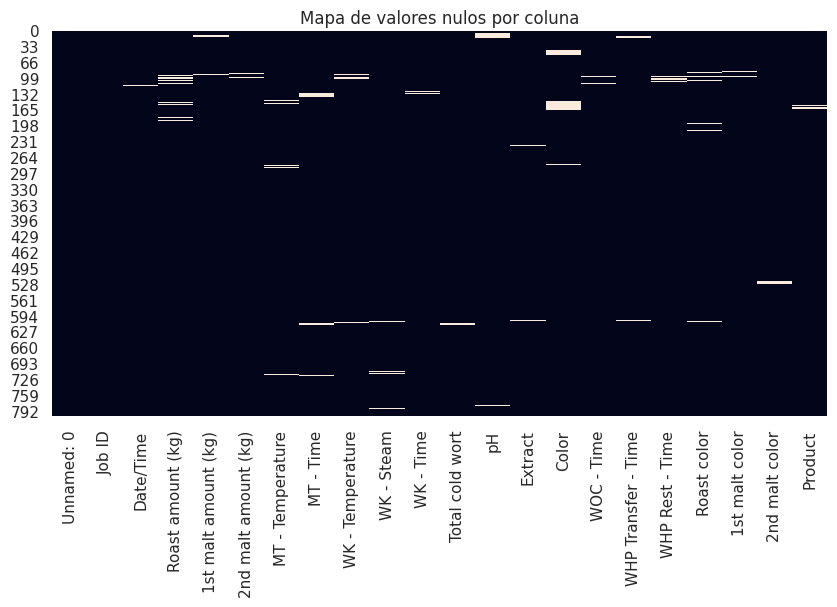

,0
Color,33
Roast amount (kg),15
MT - Time,12
pH,12
Roast color,10
1st malt amount (kg),9
WK - Temperature,9
MT - Temperature,9
WHP Rest - Time,8
2nd malt color,7


In [11]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False)
plt.title("Mapa de valores nulos por coluna")
plt.show()

df.isna().sum().sort_values(ascending=False)

**Insights sobre valores nulos**

- Algumas variáveis apresentam valores ausentes, o que é comum em processos industriais (sensores fora, leituras perdidas etc.).
- Como as variáveis são principalmente numéricas, uma estratégia razoável na modelagem será **imputação pela mediana**, por ser robusta a outliers e adequada para variáveis contínuas.
- Não há indicação de que uma variável inteira esteja totalmente perdida, então não é necessário descartar colunas inteiras neste momento.

## 4. Foco no Produto AMST

In [12]:
df["Product"].value_counts()

,count
Product,
AMST,460
HNK,336


Nosso problema pede explicitamente a construção de um modelo para o produto **AMST**.
Portanto, vou restringir o dataset a esse escopo, evitando misturar padrões de produção de receitas diferentes (por exemplo, HNK x AMST).

In [13]:
df_amst = df[df["Product"] == "AMST"].copy()
print("Dimensão do subconjunto AMST:", df_amst.shape)
df_amst.head()

Dimensão do subconjunto AMST: (460, 22)


,Unnamed: 0,Job ID,Date/Time,Roast amount (kg),1st malt amount (kg),2nd malt amount (kg),MT - Temperature,MT - Time,WK - Temperature,WK - Steam,WK - Time,Total cold wort,pH,Extract,Color,WOC - Time,WHP Transfer - Time,WHP Rest - Time,Roast color,1st malt color,2nd malt color,Product
0,0,2449959642,2020-10-22 02:50:00,64.499934,16051.99658,3999.860052,67.312984,6546.750,105.408559,6482.25,6365.075,958.900,7.296127,15.309445,14.156956,3126.100,729.925,14.494583,908.375,6.1275,6.02,AMST
1,1,2449959689,2020-10-22 05:44:00,64.500000,16067.85283,4004.256635,66.933041,6889.675,105.303989,6654.25,5929.700,963.200,7.219022,15.285057,14.270939,3135.775,733.150,14.494583,908.375,6.1275,6.02,AMST
2,2,2449959720,2020-10-22 07:00:00,64.177513,16062.20908,3996.957605,67.177043,6614.475,105.237753,7363.75,6366.150,1088.975,7.182910,14.155171,13.269140,3492.675,912.675,14.494583,908.375,6.1275,6.02,AMST
8,8,2449961201,2020-10-26 18:46:00,64.392526,NaN,4010.975385,66.901670,6708.000,105.168039,7245.50,7046.625,954.600,NaN,14.656477,18.693288,3630.275,870.750,14.494583,908.375,6.1275,6.02,AMST
9,9,2449961221,2020-10-26 20:24:00,64.177513,NaN,4012.168750,67.002759,6526.325,105.133183,6686.50,6744.550,964.275,NaN,14.653028,18.176702,3136.850,740.675,14.494583,908.375,6.1275,6.02,AMST


## 5. Exploração do Target: Color (EBC)

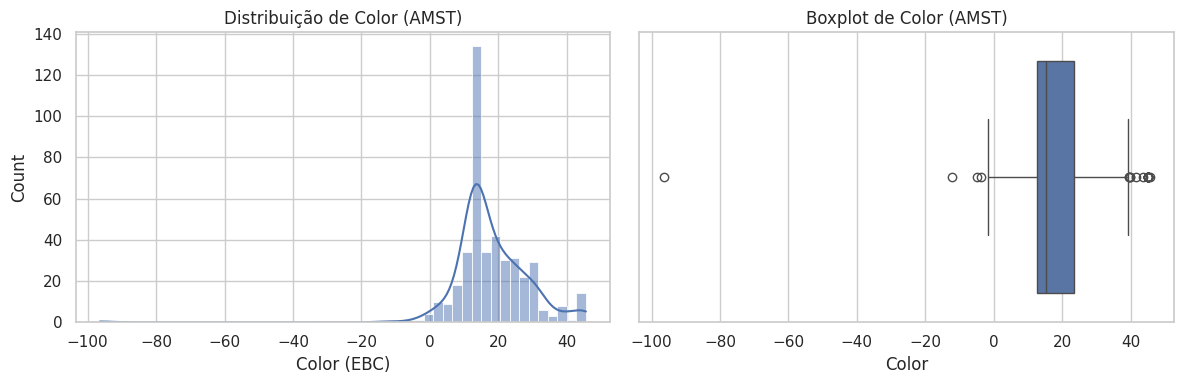

,Color
count,433.000000
mean,18.085943
std,10.983464
min,-96.427001
25%,12.801490
50%,15.161778
75%,23.491411
max,45.593386


In [14]:
plt.figure(figsize=(12, 4))

# Histograma da variavel Color
plt.subplot(1, 2, 1)
sns.histplot(df_amst["Color"], kde=True)
plt.title("Distribuição de Color (AMST)")
plt.xlabel("Color (EBC)")

# Boxplot da variavel Color
plt.subplot(1, 2, 2)
sns.boxplot(x=df_amst["Color"])
plt.title("Boxplot de Color (AMST)")

plt.tight_layout()
plt.show()

# Descrição estatistica da variavel
df_amst["Color"].describe()

**Insights sobre o target `Color`**

- A maioria dos lotes apresenta valores de `Color` em uma faixa razoável (ex.: entre ~10 e ~30 EBC).
- Existem **valores negativos de `Color`**, o que é fisicamente impossível (não existe cor negativa em EBC).
  - Isso indica claramente **erro de medição ou registro**.
- Há alguns outliers superiores que podem representar lotes problemáticos ou exceções de processo.

**Oque será feito na etapa de limpeza:**

- Remover observações com `Color` ausente.
- Remover observações com `Color < 0`, por serem inviáveis fisicamente.
- Manter outliers superiores inicialmente, pois eles podem representar casos reais de processo fora de especificação, que são importantes para o modelo aprender.

## 6. Correlação entre Variáveis Numéricas

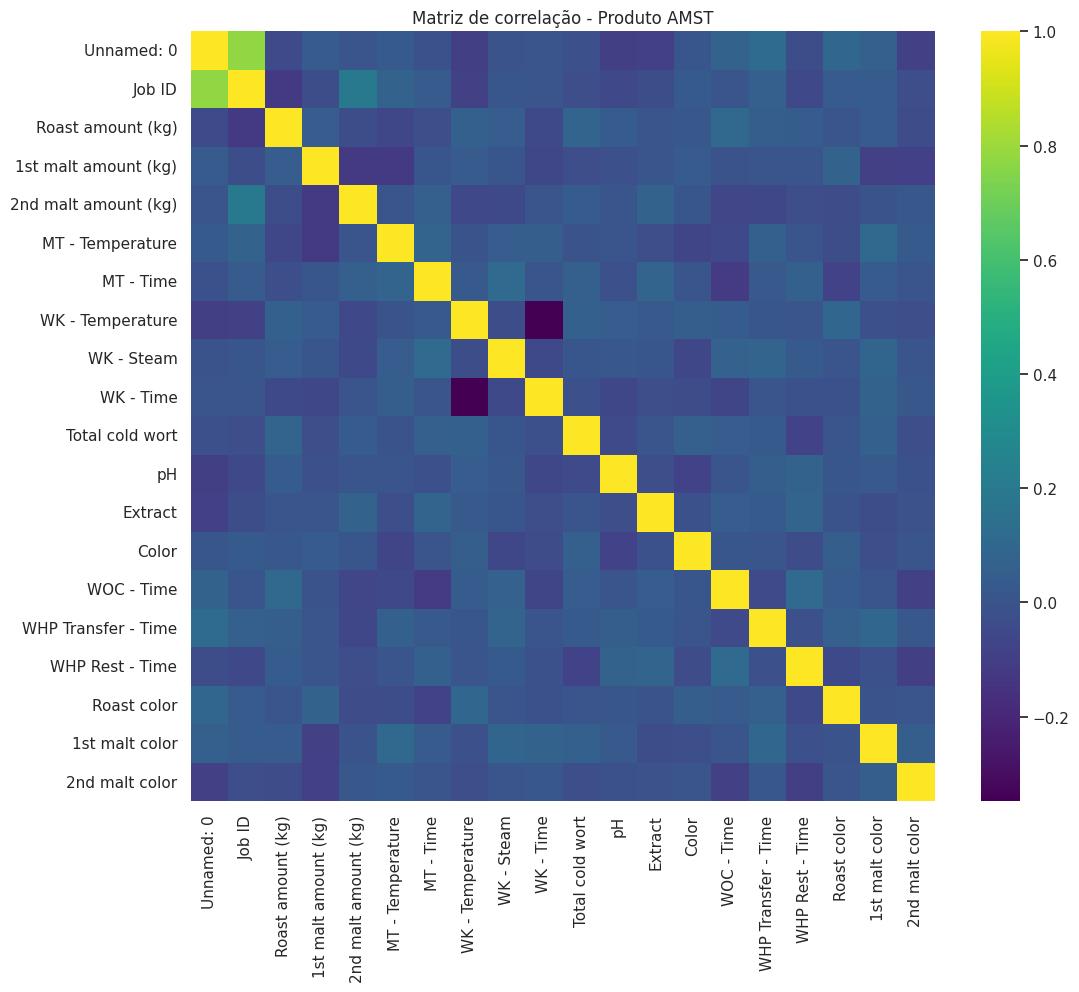

,Color
Color,1.000000
Total cold wort,0.055904
Roast color,0.050784
WK - Temperature,0.048958
1st malt amount (kg),0.033734
Job ID,0.027011
Roast amount (kg),0.018450
WOC - Time,0.013867
2nd malt amount (kg),0.013480
Unnamed: 0,0.011068


In [15]:
plt.figure(figsize=(12, 10))
corr = df_amst.corr(numeric_only=True)
sns.heatmap(corr, cmap="viridis", annot=False)
plt.title("Matriz de correlação - Produto AMST")
plt.show()

corr["Color"].sort_values(ascending=False)

**Insights sobre correlações**

- As correlações lineares simples com `Color` tendem a ser **baixas**, indicando que não existe uma única variável que explique diretamente o target.
- Isso sugere um comportamento **não linear e multivariado**, no qual a cor depende de **combinações** de:
  - quantidades de malte,
  - parâmetros térmicos,
  - tempos de processo,
  - parâmetros físico-químicos como `pH` e `Extract`.

**Implicação para modelagem:**

- Modelos puramente lineares (ex.: regressão linear simples) provavelmente terão desempenho limitado.
- Modelos capazes de capturar interações e não linearidades, como **Random Forest**, **Gradient Boosting**, **XGBoost** e **LightGBM**, tendem a ser mais apropriados.

## 7. Relações Bi-variadas entre `Color` e Variáveis Relevantes

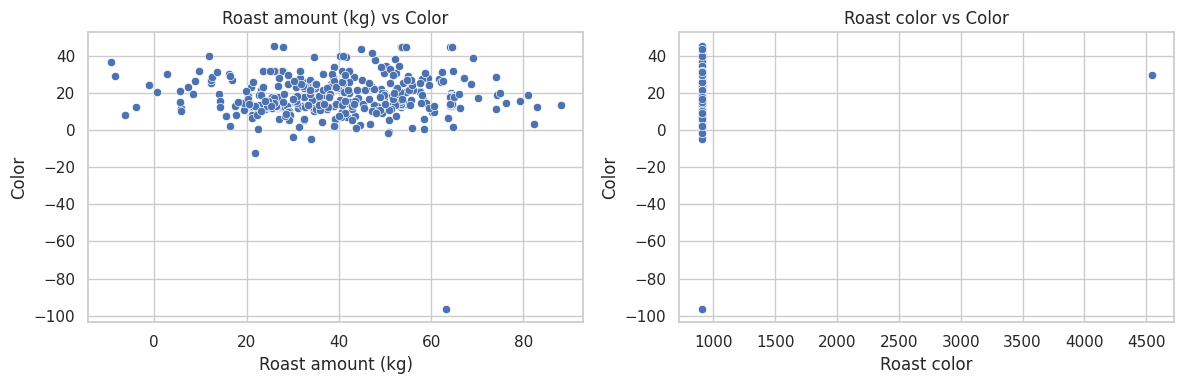

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=df_amst, x="Roast amount (kg)", y="Color", ax=ax[0])
ax[0].set_title("Roast amount (kg) vs Color")

sns.scatterplot(data=df_amst, x="Roast color", y="Color", ax=ax[1])
ax[1].set_title("Roast color vs Color")

plt.tight_layout()
plt.show()

**Insights sobre malte torrado (Roast)**

- `Roast amount (kg)` mostra um espalhamento considerável em relação a `Color`, mas observa-se uma leve tendência de aumento de cor com maior quantidade de roast.
- `Roast color` está mais diretamente relacionado à intensidade da torrefação do malte, e tende a mostrar um padrão mais estruturado em relação à cor final.

Essas observações são coerentes com o processo cervejeiro: **maltes mais torrados tendem a gerar mostos mais escuros**.  
Logo, essas variáveis são boas candidatas a terem alta importância em modelos de árvore.

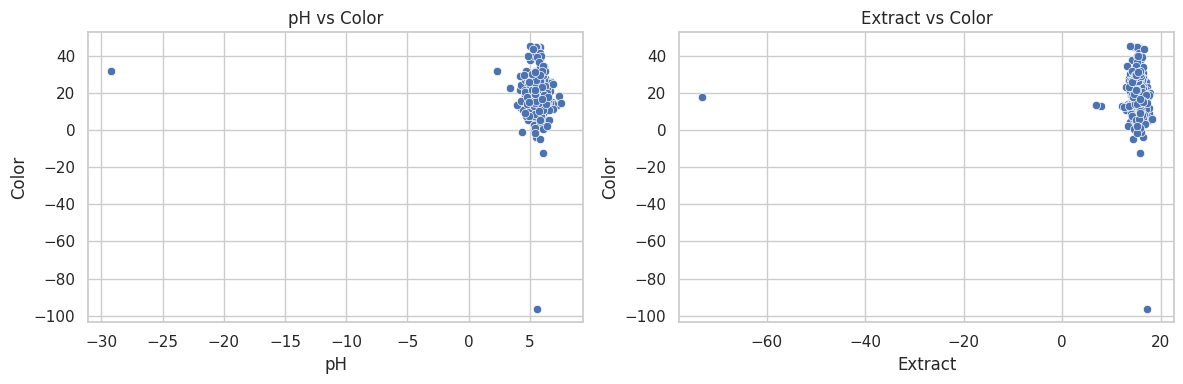

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=df_amst, x="pH", y="Color", ax=ax[0])
ax[0].set_title("pH vs Color")

sns.scatterplot(data=df_amst, x="Extract", y="Color", ax=ax[1])
ax[1].set_title("Extract vs Color")

plt.tight_layout()
plt.show()

**Insights sobre pH e Extract**

- O `pH` é um fator importante em reações químicas (Maillard, caramelização, oxidação), mas a relação direta com `Color` não parece ser linear.
- `Extract` (relacionado à concentração de açúcares) pode influenciar a formação de compostos de cor, e há um padrão leve de relação.

Essas variáveis provavelmente contribuem para a cor de maneira **interativa**, ao invés de isolada, reforçando o uso de modelos não lineares na etapa de predição.

### 7.1 Variáveis Térmicas do Processo (MT e WK)

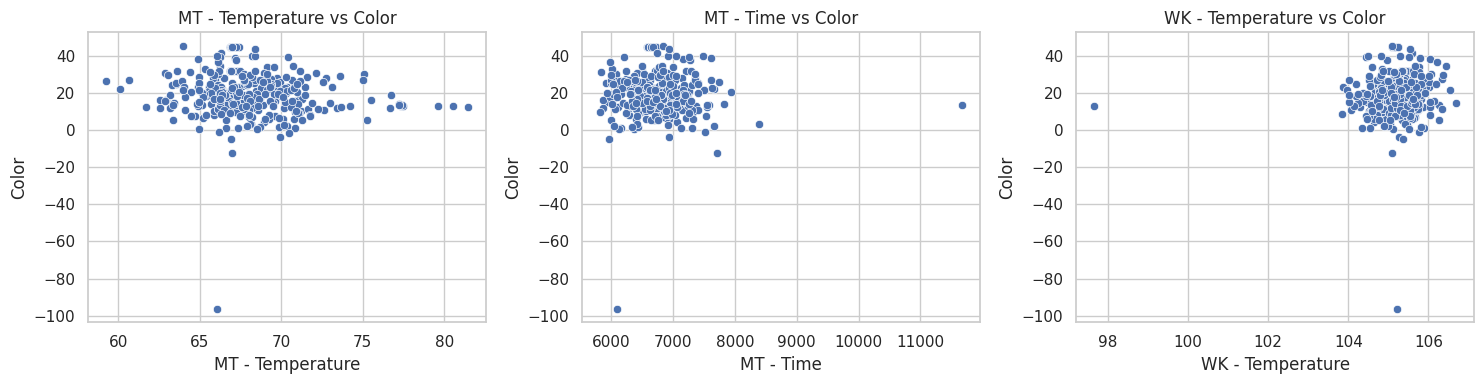

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

sns.scatterplot(data=df_amst, x="MT - Temperature", y="Color", ax=ax[0])
ax[0].set_title("MT - Temperature vs Color")

sns.scatterplot(data=df_amst, x="MT - Time", y="Color", ax=ax[1])
ax[1].set_title("MT - Time vs Color")

sns.scatterplot(data=df_amst, x="WK - Temperature", y="Color", ax=ax[2])
ax[2].set_title("WK - Temperature vs Color")

plt.tight_layout()
plt.show()

**Insights sobre variáveis térmicas**

- A relação entre temperatura/tempo e cor não é trivialmente linear, mas sabemos que o **acúmulo de energia térmica** (combinação de temperatura e tempo) afeta a cor via reações químicas (Maillard, caramelização de açúcares, escurecimento).
- É razoável supor que **interações como `temp x time`** sejam mais informativas que cada variável isolada.

Isso abre espaço para **feature engineering** como:

- `mt_energy = MT - Temperature * MT - Time`
- `wk_energy = WK - Temperature * WK - Time`

Essas features traduzem conhecimento físico do processo dentro do modelo.

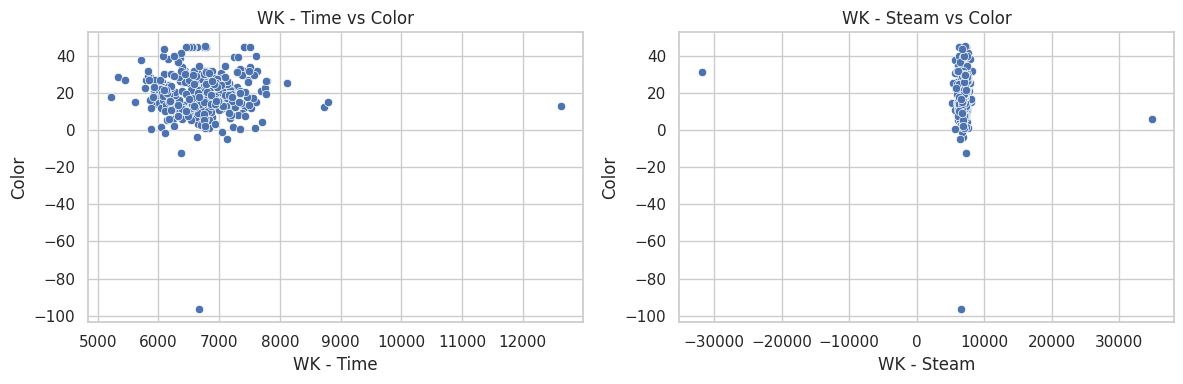

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=df_amst, x="WK - Time", y="Color", ax=ax[0])
ax[0].set_title("WK - Time vs Color")

sns.scatterplot(data=df_amst, x="WK - Steam", y="Color", ax=ax[1])
ax[1].set_title("WK - Steam vs Color")

plt.tight_layout()
plt.show()

**Insights adicionais sobre WK (Wort Kettle)**

- `WK - Time` e `WK - Steam` estão associados à energia aplicada durante a fervura do mosto.
- Embora o padrão visual pareça ruidoso, é provável que exista alguma combinação não linear dessas variáveis explicando parte da variação de `Color`.

Novamente, isso aponta para a necessidade de modelos com capacidade de capturar **interações complexas** entre variáveis.

## 8. Ideias de Feature Engineering Derivadas do EDA

In [20]:
# Exemplo ilustrativo de criação de features derivadas
df_amst_fe = df_amst.copy()

# Total de malte
df_amst_fe["total_malt"] = (
    df_amst_fe["Roast amount (kg)"]
    + df_amst_fe["1st malt amount (kg)"]
    + df_amst_fe["2nd malt amount (kg)"]
)

# Proporção de roast em relação ao total de malte
df_amst_fe["roast_pct"] = np.where(
    df_amst_fe["total_malt"] > 0,
    df_amst_fe["Roast amount (kg)"] / df_amst_fe["total_malt"],
    0.0
)

# Energia aproximada em MT e WK (proxy de calor acumulado)
df_amst_fe["mt_energy"] = df_amst_fe["MT - Temperature"] * df_amst_fe["MT - Time"]
df_amst_fe["wk_energy"] = df_amst_fe["WK - Temperature"] * df_amst_fe["WK - Time"]

df_amst_fe[["Color", "total_malt", "roast_pct", "mt_energy", "wk_energy"]].head()

,Color,total_malt,roast_pct,mt_energy,wk_energy
0,14.156956,20116.356566,0.003206,440681.281079,670933.386223
1,14.270939,20136.609465,0.003203,461146.901250,624421.063573
2,13.269140,20123.344198,0.003189,444340.871233,669959.320624
8,18.693288,NaN,0.000000,448776.403500,741079.734932
9,18.176702,NaN,0.000000,437281.781000,709076.006030


**Por que essas features fazem sentido?**

- `total_malt`: reflete a carga total de malte no lote, que influencia tanto o corpo quanto a cor.
- `roast_pct`: captura **a proporção** de malte torrado, mais informativa que o valor absoluto, principalmente quando o volume total do lote varia.
- `mt_energy` e `wk_energy`: aproximam o efeito do **acúmulo de calor** (tempo x temperatura), que influencia reações químicas ligadas à formação de cor.

## 9. Resumo do EDA e Implicações para a Modelagem

**Principais achados do EDA:**

1. O target `Color` contém **valores negativos**, que são fisicamente impossíveis e devem ser removidos na preparação do dataset para modelagem.
2. As correlações lineares entre `Color` e as demais variáveis são, em geral, **baixas**, sugerindo que o problema é fortemente **não linear e multivariado**.
3. Variáveis de processo:
   - Matérias-primas (quantidade e tipo de malte, especialmente `Roast`),
   - Parâmetros térmicos (`MT`, `WK`),
   - Parâmetros físico-químicos (`pH`, `Extract`),
   são todos candidatos importantes a explicar a variação da cor.
4. Foi identificado um conjunto de possíveis **features derivadas** (por exemplo, `total_malt`, `roast_pct`, `mt_energy`, `wk_energy`) que traduzem o entendimento físico-químico do processo em variáveis numéricas para o modelo.

**Implicações para escolha de modelos:**

- Modelos lineares simples (ex.: regressão linear/Ridge) podem servir como baseline, mas é improvável que capturem toda a complexidade do processo.
- O comportamento observado sugere o uso de modelos mais flexíveis, capazes de capturar interações e não linearidades, como:
  - **RandomForestRegressor**
  - **GradientBoostingRegressor**
  - **XGBRegressor (XGBoost)**
  - **LGBMRegressor (LightGBM)**

Na etapa de modelagem, o objetivo é:

- Aplicar regras de limpeza (remoção de `Color` negativo, NAs no target).
- Desenvolver um pipeline de pré-processamento (imputação + padronização).
- Testar diferentes modelos (incluindo baseline e modelos de árvore/boosting).
- Ajustar hiperparâmetros com validação baseada em séries temporais (TimeSeriesSplit).
- Avaliar o desempenho usando métricas como MAE, RMSE e R².